In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from GraphLaplacian.binary import GraphLaplacian, MBOBinary
from GraphLaplacian.multilabel import GLMultiClass, MBOMultiClass
from GraphLaplacian.helper import plot
import pdb
from IPython.display import clear_output
from sklearn.datasets import make_moons, make_circles, make_classification
import scipy
import pdb

sns.set()

In [2]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def create_score_sheet(method, y_true, y_pred):
    return {"Method":method, 
            "accuracy":accuracy_score(y_true, y_pred), 
            "f1_score": f1_score(y_true, y_pred), 
            "presicion": precision_score(y_true, y_pred), 
            "recall": recall_score(y_true, y_pred)}

## Data 1

In [ ]:
blue = list(zip(np.random.random(500)*1.5, np.random.random(500)*1.5 + 0.8))
red = list(zip(np.random.random(500)*1.5, np.random.random(500)*1.5 - 0.8))
Y = list(np.ones(len(blue))) + list(np.ones(len(red))*0)
X = list(blue) + list(red)

plot(X, Y, [])

## Balanced Class

In [ ]:
X0 = list(blue[:30]) + list(red[:30])
Y0 = list(np.ones(len(blue)))[:30] + list(np.ones(len(red))*0)[:30]
X1 = list(blue[30:]) + list(red[30:])

plot(X0, Y0, X1)

In [ ]:
GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
GL.solve()
plot(X0 + X1, GL.Y, [])

In [ ]:
MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
MBO.solve()
plot(X0 + X1, MBO.Y, [])

## Unbalanced Class

In [ ]:
N = 20
X0 = list(blue[:2*N]) + list(red[:N])
Y0 = list(np.ones(len(blue)))[:2*N] + list(np.ones(len(red))*0)[:N]
X1 = list(blue[2*N:]) + list(red[N:])
Y1 = list(np.ones(len(blue)))[2*N:] + list(np.ones(len(red))*0)[N:]

plot(X0, Y0, X1)

In [ ]:
ax = plot(X0, Y0, X1, return_ax=True)

In [ ]:
ax.figure.savefig("output/test.png")

In [ ]:
GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
GL.solve()
plot(X0 + X1, GL.Y, [])

In [ ]:
MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
MBO.solve()
plot(X0 + X1, MBO.Y, [])

In [ ]:
print(accuracy_score(Y1, GL.Y[len(X0):]), f1_score(Y1, GL.Y[len(X0):]))
print(accuracy_score(Y1, MBO.Y[len(X0):]), f1_score(Y1, MBO.Y[len(X0):]))

In [ ]:
result = list()
for N in [5, 10, 20, 40, 80, 160]:
    X0 = list(blue[:2*N]) + list(red[:N])
    Y0 = list(np.ones(len(blue)))[:2*N] + list(np.ones(len(red))*0)[:N]
    X1 = list(blue[2*N:]) + list(red[N:])
    Y1 = list(np.ones(len(blue)))[2*N:] + list(np.ones(len(red))*0)[N:]
    
    print("N Blue :", 2*N, "N Red :", N)
    print("Graph Laplacian")
    GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
    GL.solve()
    display(plot(X0 + X1, GL.Y, []))
    
    print("MBO")
    MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
    MBO.solve()
    display(plot(X0 + X1, MBO.Y, []))
    print("=================================")
    score_gl = create_score_sheet("Graph Laplacian", Y1, GL.Y[len(X0):])
    score_gl["N"] = N
    score_mbo = create_score_sheet("MBO", Y1, MBO.Y[len(X0):])
    score_mbo["N"] = N
    result += [
        score_gl,
        score_mbo
    ]

In [ ]:
df = pd.DataFrame(result)
df.to_csv("output/Imbalanced N 1000.csv", encoding="utf-8", index=False)

## Different Density

### 3:7

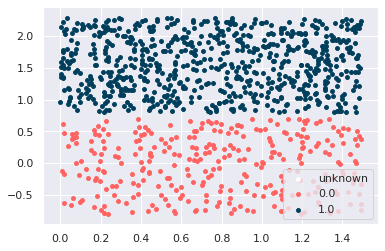

In [4]:
blue = list(zip(np.random.random(700)*1.5, np.random.random(700)*1.5 + 0.8))
red = list(zip(np.random.random(300)*1.5, np.random.random(300)*1.5 - 0.8))
Y = list(np.ones(len(blue))) + list(np.ones(len(red))*0)
X = list(blue) + list(red)

plot(X, Y, [])

N Blue : 5 N Red : 5
Graph Laplacian


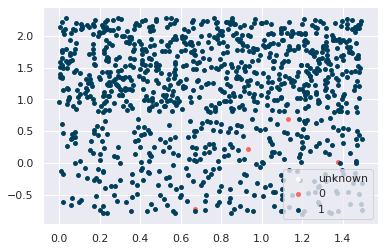

None

MBO
Interation 0 error 0.3727409638554217
Interation 1 error 0.0


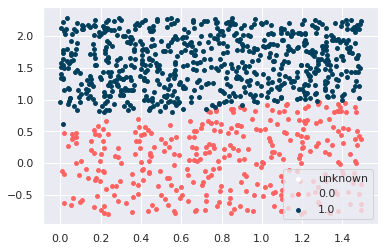

None

N Blue : 10 N Red : 10
Graph Laplacian


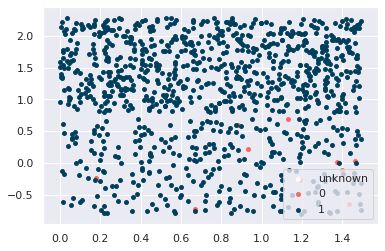

None

MBO
Interation 0 error 0.35507246376811596
Interation 1 error 0.0


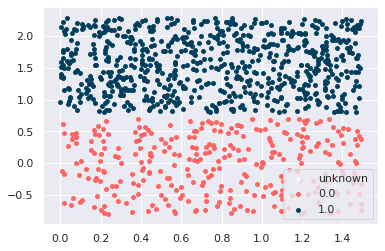

None

N Blue : 20 N Red : 20
Graph Laplacian


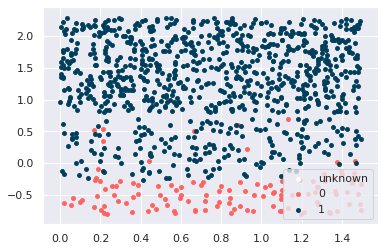

None

MBO
Interation 0 error 0.3609022556390977
Interation 1 error 0.0


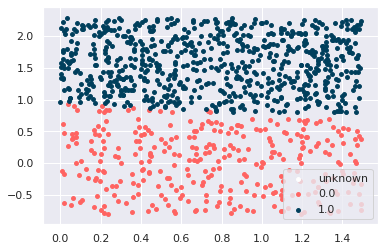

None

N Blue : 40 N Red : 40
Graph Laplacian


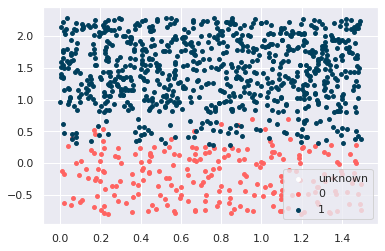

None

MBO
Interation 0 error 0.359375
Interation 1 error 0.0


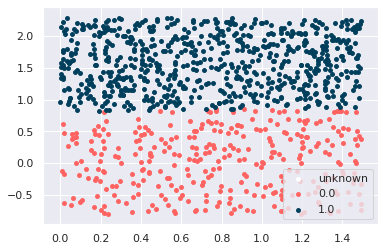

None

N Blue : 80 N Red : 80
Graph Laplacian


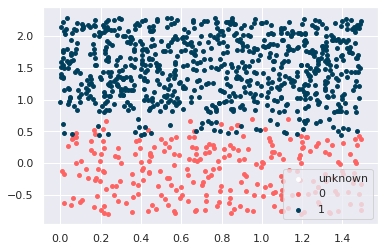

None

MBO
Interation 0 error 0.3387096774193548
Interation 1 error 0.0


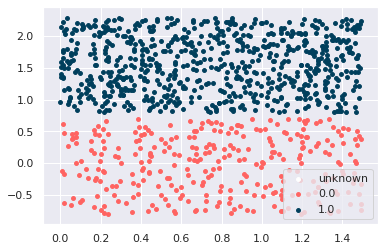

None

N Blue : 160 N Red : 160
Graph Laplacian


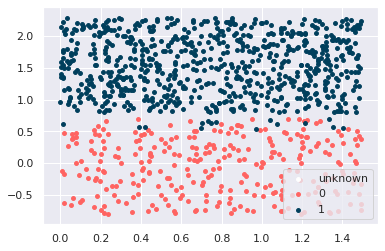

None

MBO
Interation 0 error 0.3148148148148148
Interation 1 error 0.0


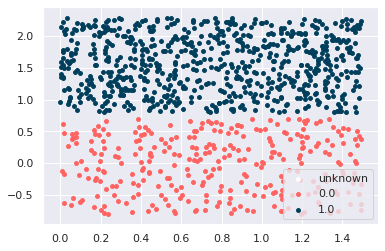

None

In [5]:
result = list()
for N in [5, 10, 20, 40, 80, 160]:
    X0 = list(blue[:N]) + list(red[:N])
    Y0 = list(np.ones(len(blue)))[:N] + list(np.ones(len(red))*0)[:N]
    X1 = list(blue[N:]) + list(red[N:])
    Y1 = list(np.ones(len(blue)))[N:] + list(np.ones(len(red))*0)[N:]
    
    print("N Blue :", N, "N Red :", N)
    print("Graph Laplacian")
    GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
    GL.solve()
    display(plot(X0 + X1, GL.Y, []))
    
    print("MBO")
    MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
    MBO.solve()
    display(plot(X0 + X1, MBO.Y, []))
    print("=================================")
    score_gl = create_score_sheet("Graph Laplacian", Y1, GL.Y[len(X0):])
    score_gl["N"] = N
    score_mbo = create_score_sheet("MBO", Y1, MBO.Y[len(X0):])
    score_mbo["N"] = N
    result += [
        score_gl,
        score_mbo
    ]

In [6]:
df = pd.DataFrame(result)
df.to_csv("output/Balanced initial_imbalance result 7_3.csv", encoding="utf-8", index=False)

In [ ]:
X0 = list(blue[:30]) + list(red[:30])
Y0 = list(np.ones(len(blue)))[:30] + list(np.ones(len(red))*0)[:30]
X1 = list(blue[30:]) + list(red[30:])

plot(X0, Y0, X1)

In [ ]:
GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
GL.solve()
plot(X0 + X1, GL.Y, [])

In [ ]:
MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
MBO.solve()
plot(X0 + X1, MBO.Y, [])

### 4.5:5.5

In [ ]:
blue = list(zip(np.random.random(450)*1.5, np.random.random(450)*1.5 + 0.8))
red = list(zip(np.random.random(550)*1.5, np.random.random(550)*1.5 - 0.8))
Y = list(np.ones(len(blue))) + list(np.ones(len(red))*0)
X = list(blue) + list(red)

plot(X, Y, [])

In [ ]:
X0 = list(blue[:30]) + list(red[:30])
Y0 = list(np.ones(len(blue)))[:30] + list(np.ones(len(red))*0)[:30]
X1 = list(blue[30:]) + list(red[30:])

plot(X0, Y0, X1)

In [ ]:
GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
GL.solve()
plot(X0 + X1, GL.Y, [])

In [ ]:
MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
MBO.solve()
plot(X0 + X1, MBO.Y, [])